In [ ]:
# import dataset from kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


## The Dataset + EDA



In [ ]:
import os

dataset_path= "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/"
for root,dirs, files in os.walk(dataset_path):
  print(root)
  for file in files[:5]:# print first 5 files per folder
    print(" ", file)

/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val/NORMAL
  NORMAL2-IM-1431-0001.jpeg
  NORMAL2-IM-1430-0001.jpeg
  NORMAL2-IM-1437-0001.jpeg
  NORMAL2-IM-1438-0001.jpeg
  NORMAL2-IM-1436-0001.jpeg
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val/PNEUMONIA
  person1950_bacteria_4881.jpeg
  person1952_bacteria_4883.jpeg
  person1946_bacteria_4874.jpeg
  person1954_bacteria_4886.jpeg
  person1951_bacteria_4882.jpeg
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray
  .DS_Store
/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_x

In [ ]:
import os # Helps in file handling, such as accessing image directories.
import pandas as pd

# Path to dataset
dataset_path = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/"

# Dataset categories
categories = ["train", "test", "val"]

data = []

for category in categories:
    category_path = os.path.join(dataset_path, category)

    for label in os.listdir(category_path):  # Should not have a second argument
        label_path = os.path.join(category_path, label)

        if os.path.isdir(label_path):  # Ensure it's a directory
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                data.append((image_path, label, category))  # Store image path, label, and dataset type

# Create DataFrame
df = pd.DataFrame(data, columns=["image_path", "label", "dataset_type"])

df.head()


,image_path,label,dataset_type
0,/root/.cache/kagglehub/datasets/paultimothymoo...,NORMAL,train
1,/root/.cache/kagglehub/datasets/paultimothymoo...,NORMAL,train
2,/root/.cache/kagglehub/datasets/paultimothymoo...,NORMAL,train
3,/root/.cache/kagglehub/datasets/paultimothymoo...,NORMAL,train
4,/root/.cache/kagglehub/datasets/paultimothymoo...,NORMAL,train


In [ ]:
train_df = df[df["dataset_type"]== "train"]
test_df = df[df["dataset_type"]== "test"]
val_df = df[df["dataset_type"]== "val"]

In [ ]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5216 entries, 0 to 5215
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_path    5216 non-null   object
 1   label         5216 non-null   object
 2   dataset_type  5216 non-null   object
dtypes: object(3)
memory usage: 163.0+ KB


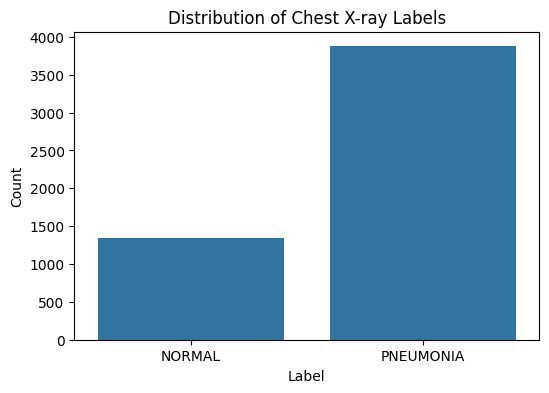

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=train_df["label"]) # label is from object type!!!
plt.title("Distribution of Chest X-ray Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [ ]:
import cv2# opencv: used for image processing and manipulation

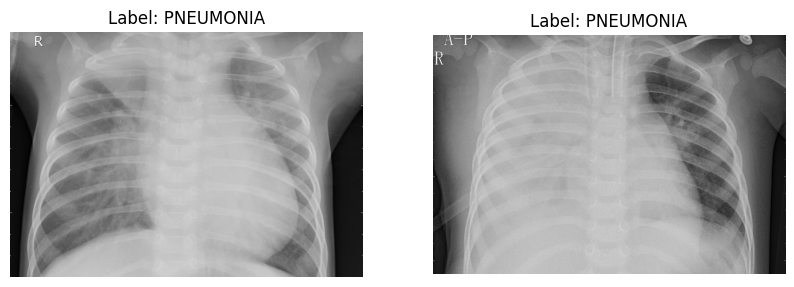

In [ ]:
# Pneumonia case
import matplotlib.pyplot as plt

# Select two example images
example_pneumonia = train_df[train_df["label"] == "PNEUMONIA"].sample(2, random_state=42)

# Plot images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, (_, row) in zip(axes, example_pneumonia.iterrows()):
    img = cv2.imread(row["image_path"], cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Label: {row['label']}")
    ax.axis("off")

plt.show()

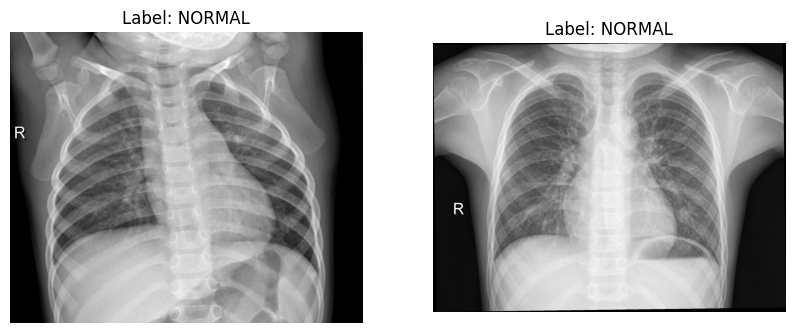

In [ ]:
# normal case
# Select two example images
example_pneumonia = train_df[train_df["label"] == "NORMAL"].sample(2, random_state=42)

# Plot images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, (_, row) in zip(axes, example_pneumonia.iterrows()):
    img = cv2.imread(row["image_path"], cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Label: {row['label']}")
    ax.axis("off")

plt.show()

In [ ]:
# Map 'PNEUMONIA' to 1 and 'NORMAL' to 0
train_df["label"] = train_df["label"].map({"PNEUMONIA": 1, "NORMAL": 0})
test_df["label"] = test_df["label"].map({"PNEUMONIA": 1, "NORMAL": 0})
val_df["label"] = val_df["label"].map({"PNEUMONIA": 1, "NORMAL": 0})


<ipython-input-23-f1f1a9c43133>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["label"] = train_df["label"].map({"PNEUMONIA": 1, "NORMAL": 0})
<ipython-input-23-f1f1a9c43133>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["label"] = test_df["label"].map({"PNEUMONIA": 1, "NORMAL": 0})
<ipython-input-23-f1f1a9c43133>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
train_df["label"].value_counts()

,count
label,
1,3875
0,1341


In [ ]:
# manually prepare data for model training

X_train = train_df.drop("label", axis=1)  # Dropping the label column from the features
y_train = train_df["label"]  # The target variable

X_test = test_df.drop("label", axis=1)  # Dropping the label column from the features
y_test = test_df["label"]  # The target variable

X_val = val_df.drop("label", axis=1)  # Dropping the label column from the features
y_val = val_df["label"]  # The target variable


## Load and Preprocess the Images
In order to train a CNN, the images have to be loaded and preprocessed first.
At this stage the df only contains the labels, the path and the dataset_type

The images have fo be resized and normalized

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_path, target_size=(64,64)):
    img = image.load_img(img_path, target_size= target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0 # Normalize to [0,1]
    return img_array


In [ ]:
# get the images for training the model
X_train = train_df["image_path"].values  # Get the image paths
X_test = test_df["image_path"].values
X_val = val_df["image_path"].values

X_train = np.array([load_and_preprocess_image(img_path) for img_path in X_train])
X_test = np.array([load_and_preprocess_image(img_path) for img_path in X_test])
X_val = np.array([load_and_preprocess_image(img_path) for img_path in X_val])


In [ ]:
len(y_train)

5216

In [ ]:
import numpy as np

class_0_train_samples = np.sum(y_train == 0)
class_1_train_samples = np.sum(y_train == 1)

class_0_test_samples = np.sum(y_test == 0)
class_1_test_samples = np.sum(y_test== 1)

print(f"Amoun of train samples: {len(X_train)}")
print("Amount of test samples:", len(X_test))
print(f"Amount of class 0 train samples: {class_0_train_samples}")
print(f"Amount of class 1 train samples: {class_1_train_samples}")
print(f"Amount of class 0 test samples: {class_0_test_samples}")
print(f"Amount of class 1 test samples: {class_1_test_samples}")

Amoun of train samples: 5216
Amount of test samples: 624
Amount of class 0 train samples: 1341
Amount of class 1 train samples: 3875
Amount of class 0 test samples: 234
Amount of class 1 test samples: 390


In [ ]:
print(X_train.shape)
print(y_train.shape)

(5216, 64, 64, 3)
(5216,)


# Model training

In [ ]:
# loading libraries
from tensorflow import keras # deep learning library that runs on top of TensorFlow
from keras.models import Sequential # A model type where layers are stacked sequentialls
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization # dense: A fully connected layer, Conv2D: A convolutional layer for extracting image features,
# maxpool2D: a pooling layer that reduces spatial dimensions, flatten: converts multi-dimensional arrays into a 1D Vecto, Dropout: randomly drops neurons to prevent overfitting,
# BatchNormalization: Normalizes activations to stabilize training
#from keras.preprocessing.image import ImageDataGenerator# generates batches of tensor image data with real-time data augmentation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau # reduces the learning rate when the model stops improving

In [ ]:
# base model suggested by chatgpt for binary classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # Example input shape (64x64 RGB images)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer= "adam", loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN model
history = model.fit(X_train, y_train,
                    epochs=10,           # Number of epochs
                    batch_size=32,       # Batch size
                    validation_data=(X_val, y_val), # Validation data
                    verbose=2)           # Display progress


Epoch 1/10
163/163 - 36s - 219ms/step - accuracy: 0.8696 - loss: 0.3084 - val_accuracy: 0.9375 - val_loss: 0.3048
Epoch 2/10
163/163 - 35s - 213ms/step - accuracy: 0.9486 - loss: 0.1314 - val_accuracy: 0.6875 - val_loss: 0.7359
Epoch 3/10
163/163 - 39s - 237ms/step - accuracy: 0.9565 - loss: 0.1171 - val_accuracy: 0.9375 - val_loss: 0.1727
Epoch 4/10
163/163 - 32s - 196ms/step - accuracy: 0.9643 - loss: 0.0979 - val_accuracy: 1.0000 - val_loss: 0.1186
Epoch 5/10
163/163 - 36s - 222ms/step - accuracy: 0.9755 - loss: 0.0712 - val_accuracy: 1.0000 - val_loss: 0.1124
Epoch 6/10
163/163 - 34s - 208ms/step - accuracy: 0.9770 - loss: 0.0613 - val_accuracy: 1.0000 - val_loss: 0.0945
Epoch 7/10
163/163 - 40s - 248ms/step - accuracy: 0.9804 - loss: 0.0523 - val_accuracy: 1.0000 - val_loss: 0.1086
Epoch 8/10
163/163 - 41s - 250ms/step - accuracy: 0.9829 - loss: 0.0446 - val_accuracy: 0.9375 - val_loss: 0.1298
Epoch 9/10
163/163 - 41s - 250ms/step - accuracy: 0.9816 - loss: 0.0500 - val_accuracy: 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

20/20 - 1s - 50ms/step - accuracy: 0.7660 - loss: 1.4503
Test Loss: 1.4502795934677124, Test Accuracy: 0.7660256624221802


## Performance assessment for unbalanced target

In [65]:
y_pred_model1 = (model.predict(X_test) > 0.5).astype("int32")  # Apply threshold 0.5 for binary classification


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step


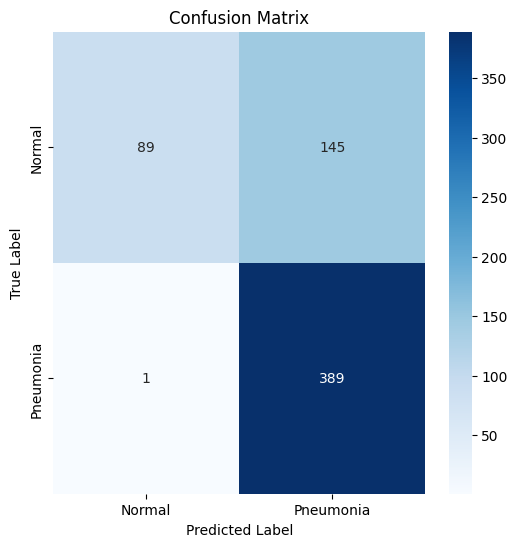

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_model1)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [67]:
# Print classification report
print(classification_report(y_test, y_pred_model1, target_names=["Normal", "Pneumonia"]))


              precision    recall  f1-score   support

      Normal       0.99      0.38      0.55       234
   Pneumonia       0.73      1.00      0.84       390

    accuracy                           0.77       624
   macro avg       0.86      0.69      0.70       624
weighted avg       0.83      0.77      0.73       624



In [51]:
# Check the distribution of y_test
print(y_test.value_counts())
print(y_test.info())

# Calculate the percentage of normal cases
normal_count = (y_test == 0).sum()  # Count occurrences where y_test is 0
total = len(y_test)  # Total number of test samples
percentage_normal = (normal_count / total) * 100  # Compute percentage

print(f"Percentage of normal cases: {percentage_normal:.2f}%")



label
1    390
0    234
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
Index: 624 entries, 5216 to 5839
Series name: label
Non-Null Count  Dtype
--------------  -----
624 non-null    int64
dtypes: int64(1)
memory usage: 9.8 KB
None
Percentage of normal cases: 37.50%


# Second model

In [54]:
model2 = Sequential()

# Adjust input shape to match (64, 64, 3)
model2.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(64, 64, 3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2), strides=2, padding='same'))

model2.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2), strides=2, padding='same'))

model2.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2), strides=2, padding='same'))

model2.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2), strides=2, padding='same'))

model2.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2, 2), strides=2, padding='same'))

model2.add(Flatten())
model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=1, activation='sigmoid'))

model2.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │              

 Total params: 558,849 (2.13 MB)

 Trainable params: 557,761 (2.13 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [55]:
history = model2.fit(X_train, y_train,
                    epochs=10,           # Number of epochs
                    batch_size=32,       # Batch size
                    validation_data=(X_val, y_val), # Validation data
                    verbose=2)           # Display progress


Epoch 1/10
163/163 - 71s - 436ms/step - accuracy: 0.9009 - loss: 0.2779 - val_accuracy: 0.5000 - val_loss: 7.3363
Epoch 2/10
163/163 - 81s - 494ms/step - accuracy: 0.9572 - loss: 0.1160 - val_accuracy: 0.5000 - val_loss: 8.3816
Epoch 3/10
163/163 - 84s - 515ms/step - accuracy: 0.9705 - loss: 0.0836 - val_accuracy: 0.5000 - val_loss: 3.7783
Epoch 4/10
163/163 - 81s - 495ms/step - accuracy: 0.9757 - loss: 0.0613 - val_accuracy: 0.5625 - val_loss: 6.2006
Epoch 5/10
163/163 - 66s - 405ms/step - accuracy: 0.9793 - loss: 0.0629 - val_accuracy: 1.0000 - val_loss: 0.1117
Epoch 6/10
163/163 - 103s - 629ms/step - accuracy: 0.9806 - loss: 0.0504 - val_accuracy: 0.5625 - val_loss: 3.5179
Epoch 7/10
163/163 - 120s - 737ms/step - accuracy: 0.9879 - loss: 0.0421 - val_accuracy: 0.8125 - val_loss: 0.9405
Epoch 8/10
163/163 - 70s - 430ms/step - accuracy: 0.9898 - loss: 0.0355 - val_accuracy: 0.7500 - val_loss: 0.8631
Epoch 9/10
163/163 - 75s - 463ms/step - accuracy: 0.9931 - loss: 0.0237 - val_accuracy

In [58]:
# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

20/20 - 1s - 74ms/step - accuracy: 0.7724 - loss: 1.4406
Test Loss: 1.440625548362732, Test Accuracy: 0.7724359035491943


In [62]:
y_pred_model2 = (model2.prst) > 0.5).astype("int32")  # Apply threshold 0.5 for binary classificationedict(X_te

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step


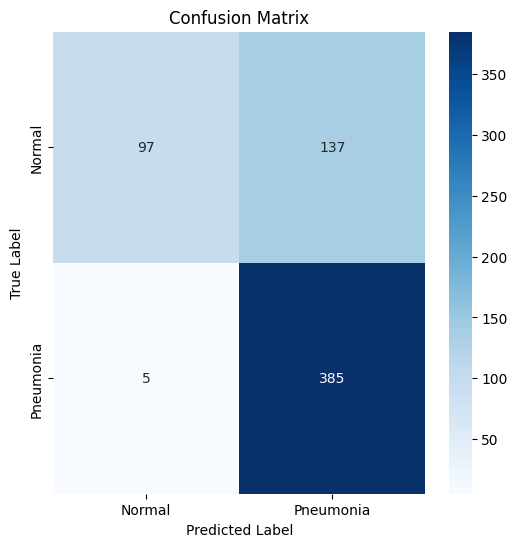

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_model2)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [64]:
# Print classification report
print(classification_report(y_test, y_pred_model2, target_names=["Normal", "Pneumonia"]))

              precision    recall  f1-score   support

      Normal       0.95      0.41      0.58       234
   Pneumonia       0.74      0.99      0.84       390

    accuracy                           0.77       624
   macro avg       0.84      0.70      0.71       624
weighted avg       0.82      0.77      0.74       624



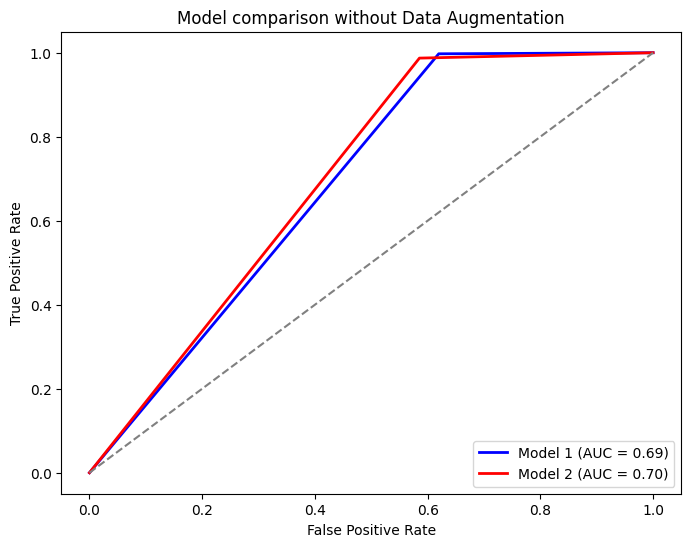

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for model1 on test data
fpr1, tpr1, _ = roc_curve(y_test, y_pred_model1)
roc_auc1 = auc(fpr1, tpr1)

# Compute ROC curve for model2 on test data
fpr2, tpr2, _ = roc_curve(y_test, y_pred_model2)
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curve for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Model 1 (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'Model 2 (AUC = {roc_auc2:.2f})')

# Plot diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Model comparison without Data Augmentation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()



# Data augmentation

## Model 1

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 30, # Randomly rotate images in a predefined range of 0 to 180 degrees (here the range is from -30 degrees and +30 degrees)
    zoom_range = 0.2, # randomly zoom images
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True, # randomly flip images horizontally
    vertical_flip = False # randomly flip images vertically

)

# Fit the data generator on your training data
datagen.fit(X_train)

# Create a model instance for more clearity
# Define the CNN model
model3 = Sequential()

# First convolutional layer
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # Example input shape (64x64 RGB images)
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from convolutional layers
model3.add(Flatten())

# Fully connected layer
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer with sigmoid activation for binary classification
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(optimizer= "adam", loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
#model3.summary()


# Model 1 with data augmentation
history = model3.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=10,  # Number of epochs
                    validation_data=(X_val, y_val),  # Validation data
                    verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 - 46s - 285ms/step - accuracy: 0.7500 - loss: 0.5457 - val_accuracy: 0.6875 - val_loss: 0.6005
Epoch 2/10
163/163 - 39s - 238ms/step - accuracy: 0.8382 - loss: 0.3663 - val_accuracy: 0.5625 - val_loss: 0.8644
Epoch 3/10
163/163 - 39s - 241ms/step - accuracy: 0.8635 - loss: 0.3179 - val_accuracy: 0.7500 - val_loss: 0.9935
Epoch 4/10
163/163 - 39s - 236ms/step - accuracy: 0.8836 - loss: 0.2660 - val_accuracy: 0.7500 - val_loss: 0.6109
Epoch 5/10
163/163 - 59s - 363ms/step - accuracy: 0.8995 - loss: 0.2350 - val_accuracy: 0.7500 - val_loss: 0.5109
Epoch 6/10
163/163 - 48s - 297ms/step - accuracy: 0.9055 - loss: 0.2281 - val_accuracy: 0.6250 - val_loss: 0.5427
Epoch 7/10
163/163 - 66s - 402ms/step - accuracy: 0.9158 - loss: 0.2161 - val_accuracy: 0.7500 - val_loss: 0.5336
Epoch 8/10
163/163 - 55s - 338ms/step - accuracy: 0.9218 - loss: 0.2016 - val_accuracy: 0.8125 - val_loss: 0.4705
Epoch 9/10
163/163 - 40s - 248ms/step - accuracy: 0.9294 - loss: 0.1798 - val_accuracy: 

In [74]:
# Evaluate the model on the test set
test_loss_model3, test_accuracy_model3 = model3.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss_model3}, Test Accuracy: {test_accuracy_model3}")

20/20 - 3s - 127ms/step - accuracy: 0.9119 - loss: 0.2321
Test Loss: 0.23212409019470215, Test Accuracy: 0.9118589758872986


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


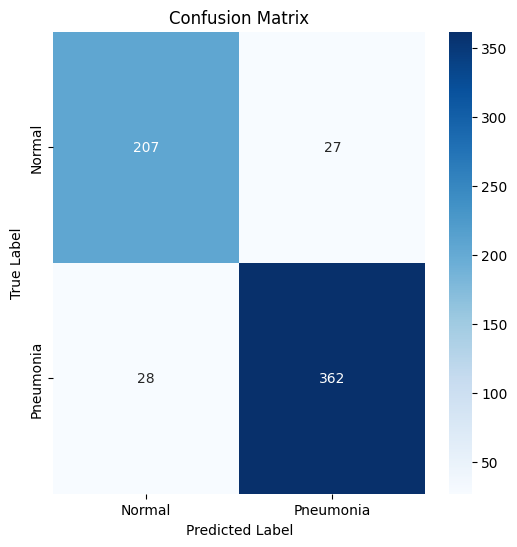

              precision    recall  f1-score   support

      Normal       0.88      0.88      0.88       234
   Pneumonia       0.93      0.93      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.91      0.91      0.91       624



In [76]:
y_pred_model3 = (model3.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_model3)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_model3, target_names=["Normal", "Pneumonia"]))

## Model 2

In [77]:
model4 = Sequential()

# Adjust input shape to match (64, 64, 3)
model4.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(64, 64, 3)))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2), strides=2, padding='same'))

model4.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model4.add(Dropout(0.1))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2), strides=2, padding='same'))

model4.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2), strides=2, padding='same'))

model4.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model4.add(Dropout(0.2))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2), strides=2, padding='same'))

model4.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model4.add(Dropout(0.2))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2, 2), strides=2, padding='same'))

model4.add(Flatten())
model4.add(Dense(units=128, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(units=1, activation='sigmoid'))

model4.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

history = model4.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=10,  # Number of epochs
                    validation_data=(X_val, y_val),  # Validation data
                    verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 - 82s - 502ms/step - accuracy: 0.8553 - loss: 0.3657 - val_accuracy: 0.5000 - val_loss: 10.9659
Epoch 2/10
163/163 - 75s - 462ms/step - accuracy: 0.9051 - loss: 0.2381 - val_accuracy: 0.5000 - val_loss: 15.2770
Epoch 3/10
163/163 - 72s - 443ms/step - accuracy: 0.9239 - loss: 0.2065 - val_accuracy: 0.5000 - val_loss: 8.0591
Epoch 4/10
163/163 - 72s - 442ms/step - accuracy: 0.9314 - loss: 0.1845 - val_accuracy: 0.5625 - val_loss: 1.2441
Epoch 5/10
163/163 - 71s - 437ms/step - accuracy: 0.9425 - loss: 0.1633 - val_accuracy: 0.5000 - val_loss: 7.8774
Epoch 6/10
163/163 - 74s - 455ms/step - accuracy: 0.9436 - loss: 0.1588 - val_accuracy: 0.5000 - val_loss: 12.1597
Epoch 7/10
163/163 - 104s - 635ms/step - accuracy: 0.9486 - loss: 0.1425 - val_accuracy: 0.5625 - val_loss: 0.6976
Epoch 8/10
163/163 - 72s - 442ms/step - accuracy: 0.9469 - loss: 0.1523 - val_accuracy: 0.5625 - val_loss: 0.9290
Epoch 9/10
163/163 - 71s - 437ms/step - accuracy: 0.9496 - loss: 0.1459 - val_accuracy: 0.8125 

In [78]:
# Evaluate the model on the test set
test_loss_model4, test_accuracy_model4 = model4.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss_model4}, Test Accuracy: {test_accuracy_model4}")

20/20 - 3s - 158ms/step - accuracy: 0.8269 - loss: 0.3720
Test Loss: 0.3719920516014099, Test Accuracy: 0.8269230723381042


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step


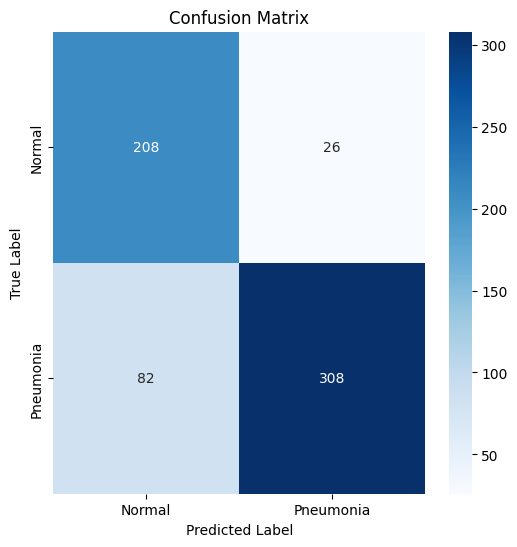

              precision    recall  f1-score   support

      Normal       0.72      0.89      0.79       234
   Pneumonia       0.92      0.79      0.85       390

    accuracy                           0.83       624
   macro avg       0.82      0.84      0.82       624
weighted avg       0.85      0.83      0.83       624



In [79]:
y_pred_model4 = (model4.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_model4)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_model4, target_names=["Normal", "Pneumonia"]))

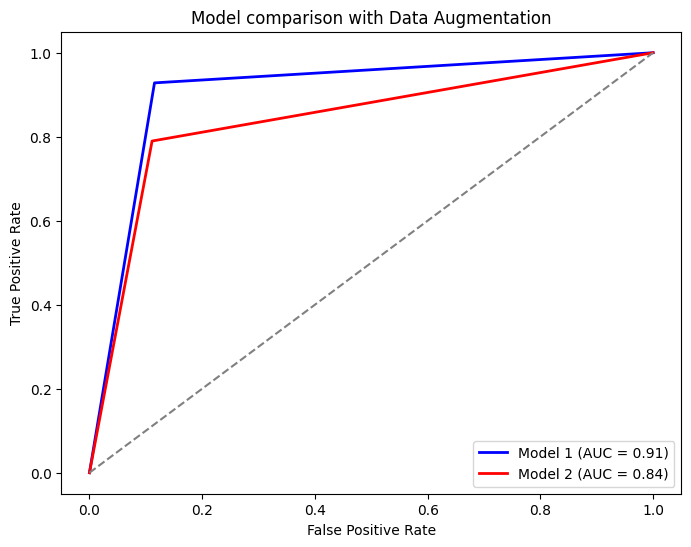

In [80]:
# Compute ROC curve for model1 on test data
fpr1, tpr1, _ = roc_curve(y_test, y_pred_model3)
roc_auc1 = auc(fpr1, tpr1)

# Compute ROC curve for model2 on test data
fpr2, tpr2, _ = roc_curve(y_test, y_pred_model4)
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curve for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Model 1 (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'Model 2 (AUC = {roc_auc2:.2f})')

# Plot diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Model comparison with Data Augmentation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()